In [1]:
import pandas as pd
import seaborn
from pandas import DataFrame
%matplotlib inline
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
ecoystem = '_nuget'

Fig 9

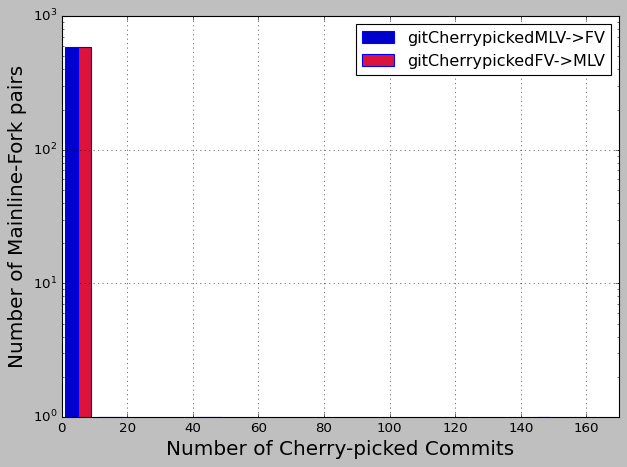

In [2]:
plt.style.use('classic')
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

y1 = df['CherryMlV']
y2 = df['CherryFV']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
plt.hist((y1,y2), bins=bins, edgecolor='b', label=('gitCherrypickedMLV->FV','gitCherrypickedFV->MLV' ), color=('#0000CD', '#DC143C'))
plt.xlim(0,170)
plt.grid(True)
plt.legend()
plt.ylabel('Number of Mainline-Fork pairs', fontsize=18)
plt.xlabel('Number of Cherry-picked Commits', fontsize=18)
plt.yticks(np.arange(0, 11000))
plt.yscale('log')
# plt.xticks((0.25, 0.75), (0, 1))
plt.tight_layout()
plt.savefig('../img/gitCherrypick{}.pdf'.format(ecoystem))

Fig 10

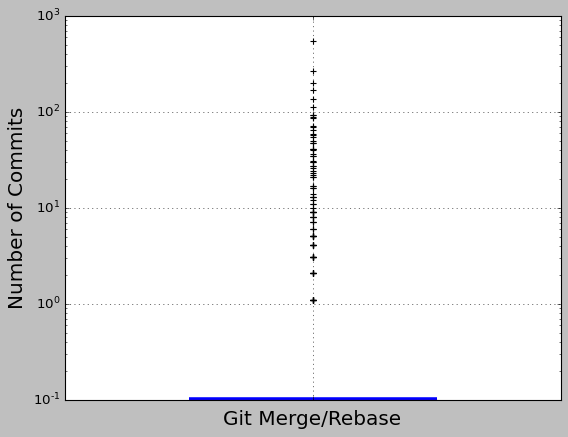

<Figure size 640x480 with 0 Axes>

In [15]:
# %matplotlib inline
plt.style.use('classic')
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

plt.style.use('classic')
y1 = df['Git_MgRb_Com'] + 0.1

plt.boxplot(y1, widths=0.5, patch_artist=True, boxprops=dict(facecolor='#008080', linewidth=5))

plt.ylim(0.1,1000)
plt.grid(True)
plt.xlabel('Git Merge/Rebase', fontsize=18)
plt.ylabel('Number of Commits', fontsize=18)
plt.xticks([1], [''])
plt.yscale('log')
plt.show()
plt.savefig('../img/gitPull{}.pdf'.format(ecoystem))


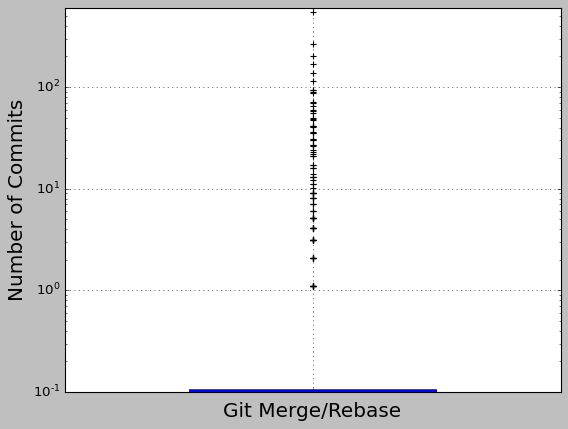

In [16]:
# %matplotlib inline
plt.boxplot(df["Git_MgRb_Com"]+0.1, widths=0.5, patch_artist=True, medianprops=dict(color='red'), capprops=dict(color='red'), boxprops=dict(facecolor='#008080', color='blue', linewidth=5), whiskerprops=dict(color='red'),)
plt.ylim(0.1,600)
plt.grid(True)
plt.xlabel('Git Merge/Rebase', fontsize=18)
plt.ylabel('Number of Commits', fontsize=18)
plt.xticks([1], [''])
plt.yscale('log')
plt.savefig('../img/gitPull{}.pdf'.format(ecoystem))
plt.show()

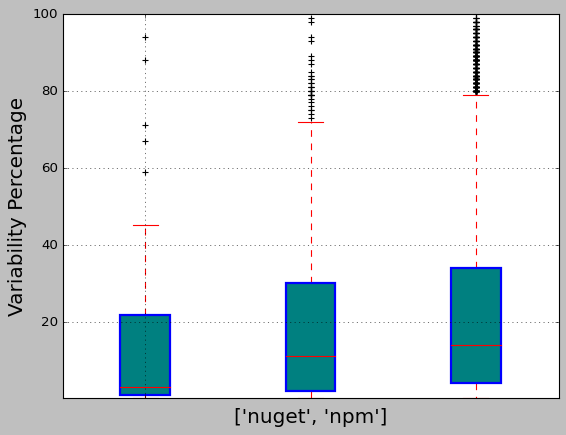

In [29]:
plt.style.use('classic')
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

df1 = pd.read_csv('../Dataset_npm.csv', sep=';')

df2 = pd.read_csv('../Dataset_Android.csv', sep=';')

# y1 = df['Variability1']
# fig, ax = plt.subplots()
# ax.set_yscale('log', basey=2)
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# plt.hist(y1, bins=bins, edgecolor='black', label='Variability Percentage', color='#6A5ACD')
# plt.xlim(0,100)
# plt.minorticks_on()
# plt.grid(True, which='m
# ajor', color='#2F4F4F')
# plt.grid(True, which='minor', color='#DCDCDC')

plt.boxplot([df2["Variability1"], df["Variability1"], df1["Variability1"]], widths=0.3, patch_artist=True, medianprops=dict(color='red'), capprops=dict(color='red'), boxprops=dict(facecolor='#008080', color='blue', linewidth=2), whiskerprops=dict(color='red'),)
plt.ylim(0.1,100)
plt.grid(True)
plt.xlabel(['nuget', 'npm'], fontsize=18)
plt.ylabel('Variability Percentage', fontsize=18)
plt.xticks([1], [''])
# plt.yscale('log')
# plt.savefig('../img/gitPull{}.pdf'.format(ecoystem))
plt.show()

median = df['Variability1'].median()
# color = '#8B0000'
# plt.axvline(median, color=color, label = 'Median', linewidth=3)
# plt.ylabel('Number of Mainline-Fork pairs', fontsize=18)
# plt.xlabel('Fork Variability Percentage', fontsize=18)
# plt.yticks(np.arange(0, 100, 10))
# plt.xticks(np.arange(0, 1100, 10))
# plt.legend()
# plt.tight_layout()
# plt.savefig('../img/variability{}.pdf'.format(ecoystem))
# plt.show()

# y1 = y1.sort_values()
# x1 = range(1,len(y1)+1)
# plt.plot(x1, y1, color='#6A5ACD', linewidth=2, marker='o', label='Variability Percentage')
# plt.xlim(1,11000)
# plt.ylim(0,101)
# plt.xscale('log')
# plt.axhline(median, color=color, label = 'Median', linewidth=2)
# plt.yticks(np.arange(0, 101, 10))
# plt.xlabel('Fork variant', fontsize=20)
# plt.ylabel('Variability Percentage', fontsize=20)
# plt.legend(fontsize=20, loc="upper left")
# plt.grid(True, which='major', color='#2F4F4F')
# plt.grid(True, which='minor', color='#DCDCDC', linestyle='-')
# plt.tight_layout()
# plt.savefig('../img/variability1{}.pdf'.format(ecoystem))
# plt.show()

   counts  numbers
0       2      475
1       3       43
2       4        4
3       5        3
4       6        1


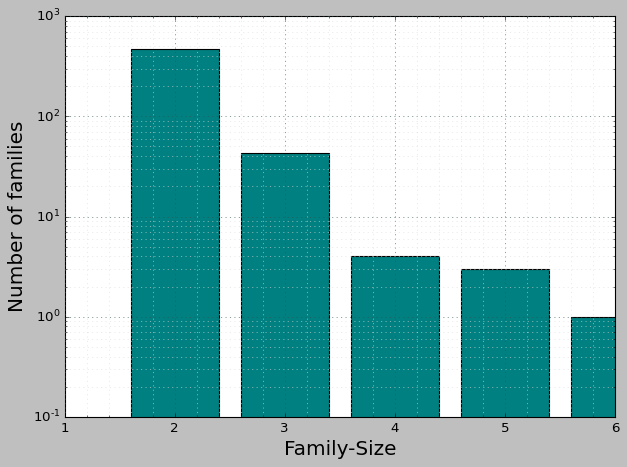

In [2]:
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

plt.style.use('classic')
df_fam1 = DataFrame({'count' : df.groupby( ['mainline_repo'] ).size()}).reset_index()
df_fam1['count'] = df_fam1['count'] +1
# print(df_fam1['count'].sort_values().head(10))
df22 = df.groupby(['mainline_repo']).size().reset_index(name='counts')
df22 = df22.set_index('counts')
df22 = df22.groupby(['counts']).size().reset_index(name='numbers')
df22['counts'] =df22['counts'] + 1
print(df22)
plt.xlabel('Family-Size', fontsize=18)
plt.ylabel('Number of families',fontsize=18)
plt.minorticks_on()
plt.grid(True, which='major', color='#2F4F4F')
plt.grid(True, which='minor', color='#DCDCDC')
plt.bar(df22['counts'],df22['numbers'], color='#008080')
plt.xlim(1,6)
plt.ylim(0.1,1000)
plt.yscale('log')
plt.tight_layout()
# plt.savefig('../img/variants{}.pdf'.format(ecoystem))
plt.show()


<ipython-input-5-1da49b4204cd>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)
<ipython-input-5-1da49b4204cd>:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,100000)


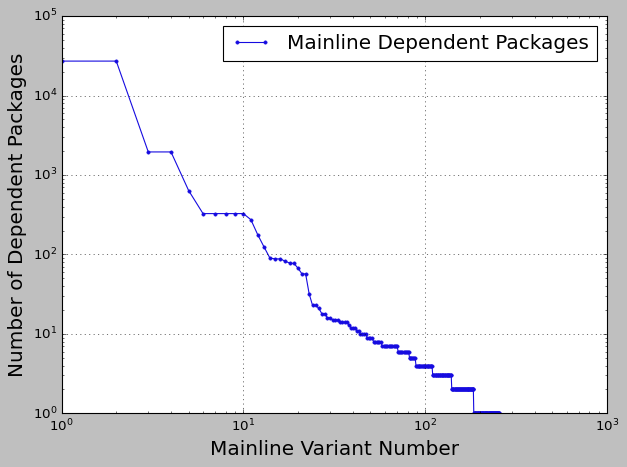

In [5]:
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

plt.style.use('classic')
x1 = range(1,len(df['dependent_package_mainline'])+1)
y_d = df['dependent_package_mainline'].sort_values(ascending=False)

plt.plot(x1, y_d, color='#160be0', label='Mainline Dependent Packages', linewidth=1, marker='.')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0,1000)
plt.ylim(0,100000)
plt.xlabel('Mainline Variant Number', fontsize=18)
plt.ylabel('Number of Dependent Packages', fontsize=18)
# Put a legend below current axis
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('../img/dependent_packages_mainline{}.pdf'.format(ecoystem))
plt.show()



<ipython-input-11-8b9cb6a48743>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1120)


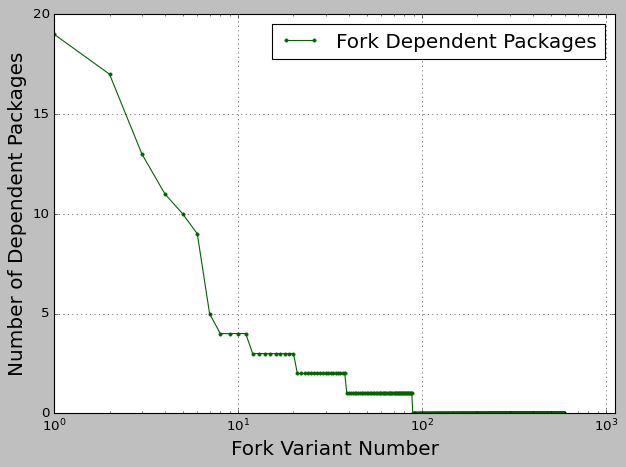

In [11]:
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

plt.style.use('classic')
x1 = range(1,len(df['dependent_packages_variant'])+1)
y_d = df['dependent_packages_variant'].sort_values(ascending=False)

plt.plot(x1, y_d, color='#006400', label='Fork Dependent Packages', linewidth=1, marker='.')
plt.grid(True)
plt.xscale('log')
# plt.yscale('log')
plt.xlim(0,1120)
plt.ylim(0,20)
plt.xlabel('Fork Variant Number', fontsize=18)
plt.ylabel('Number of Dependent Packages', fontsize=18)
# Put a legend below current axis
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('../img/dependent_packages_variant{}.pdf'.format(ecoystem))
plt.show()

<ipython-input-19-ac696a1c6988>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,12000)


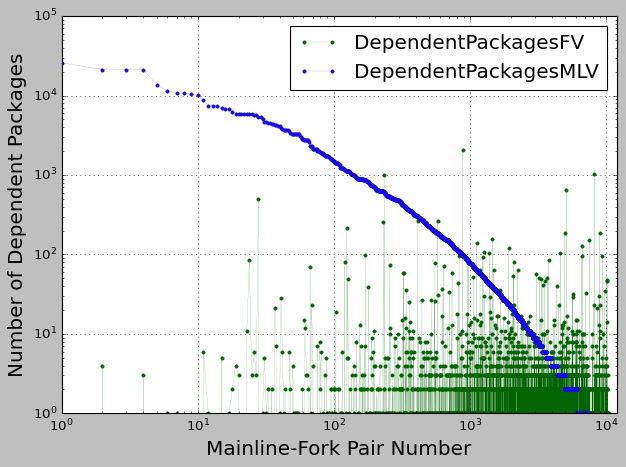

In [19]:
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

plt.style.use('classic')


x2 = range(1,len(df['dependent_package_mainline'])+1)
df = df.sort_values(by = ['dependent_package_mainline'], ascending=False)
y1 = df['dependent_package_mainline']
y2 = df['dependent_packages_variant']

plt.plot(x2, y2, color='#006400', label='DependentPackagesFV', linewidth=0.1, marker='.')
plt.plot(x2, y1, color='#160be0', label='DependentPackagesMLV', linewidth=0.1, marker='.')

plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.xlim(0,12000)
plt.xlabel('Mainline-Fork Pair Number', fontsize=18)
plt.ylabel('Number of Dependent Packages', fontsize=18)
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('../img/dependent_packages_MLV-FV{}.pdf'.format(ecoystem))
plt.show()

Index(['No', 'mainline', 'variants', 'common_developers'], dtype='object')
  common_developers  counts
0                No     937
1               Yes      48


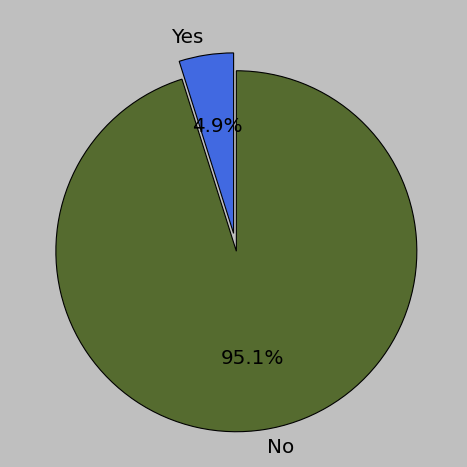

In [114]:
def make_autopct(slices):
    def my_autopct(pct):
        total = sum(slices)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

dfComp = pd.read_csv('../{}_common_developers.csv'.format(ecoystem), sep=';')
print(dfComp.columns)
plt.style.use('classic')
dfComp = dfComp.groupby(['common_developers']).size().reset_index(name='counts')
print(dfComp)
plt.style.use('classic')
slices = [dfComp.iloc[1,1], dfComp.iloc[0,1]]
labels = ('Yes', 'No')
colors=['#4169E1','#556B2F']

explode = [0, 0.1]
plt.pie(slices, labels=labels, textprops={'fontsize': 18}, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.tight_layout()
plt.savefig('../img/devs_{}.pdf'.format(ecoystem))
plt.show()

<ipython-input-20-0cd457e01b27>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,12000)


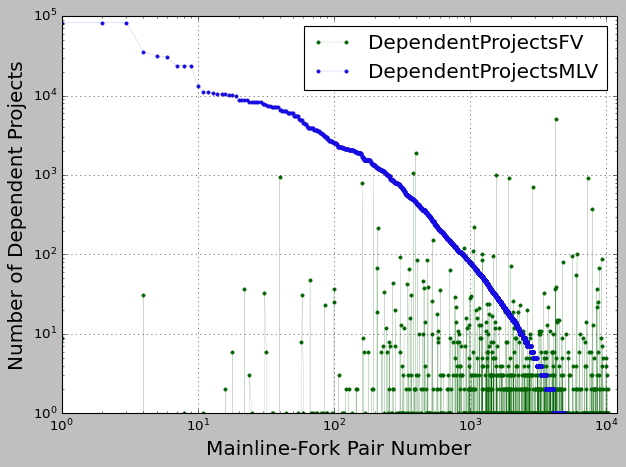

In [20]:
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

plt.style.use('classic')


x2 = range(1,len(df['dependent_projects_mainline'])+1)
df = df.sort_values(by = ['dependent_projects_mainline'], ascending=False)
y1 = df['dependent_projects_mainline']
y2 = df['dependent_projects_variant']

plt.plot(x2, y2, color='#006400', label='DependentProjectsFV', linewidth=0.1, marker='.')
plt.plot(x2, y1, color='#160be0', label='DependentProjectsMLV', linewidth=0.1, marker='.')

plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.xlim(0,12000)
plt.xlabel('Mainline-Fork Pair Number', fontsize=18)
plt.ylabel('Number of Dependent Projects', fontsize=18)
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('../img/dependent_proj_MLV-FV{}.pdf'.format(ecoystem))
plt.show()

<ipython-input-21-da29b9ab2b5a>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)
<ipython-input-21-da29b9ab2b5a>:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,100000)


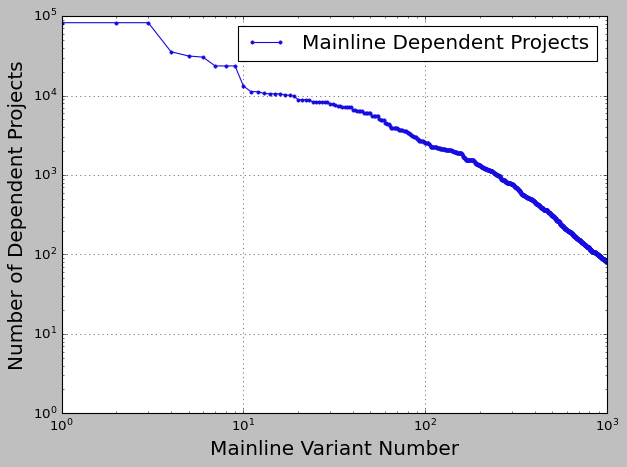

In [21]:
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

plt.style.use('classic')
x1 = range(1,len(df['dependent_projects_mainline'])+1)
y_d = df['dependent_projects_mainline'].sort_values(ascending=False)

plt.plot(x1, y_d, color='#160be0', label='Mainline Dependent Projects', linewidth=1, marker='.')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0,1000)
plt.ylim(0,100000)
plt.xlabel('Mainline Variant Number', fontsize=18)
plt.ylabel('Number of Dependent Projects', fontsize=18)
# Put a legend below current axis
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('../img/dependent_proj_mainline{}.pdf'.format(ecoystem))
plt.show()



<ipython-input-10-82539ceacce2>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1100)
<ipython-input-10-82539ceacce2>:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10000)


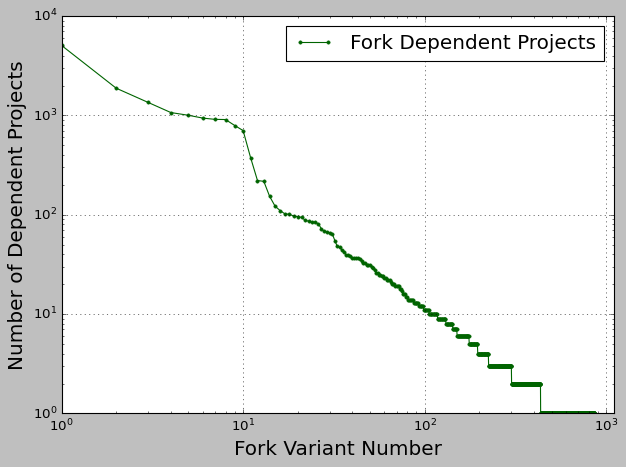

In [10]:
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

plt.style.use('classic')
x1 = range(1,len(df['dependent_projects_variant'])+1)
y_d = df['dependent_projects_variant'].sort_values(ascending=False)

plt.plot(x1, y_d, color='#006400', label='Fork Dependent Projects', linewidth=1, marker='.')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0,1100)
plt.ylim(0,10000)
plt.xlabel('Fork Variant Number', fontsize=18)
plt.ylabel('Number of Dependent Projects', fontsize=18)
# Put a legend below current axis
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('../img/dependent_proj_variant{}.pdf'.format(ecoystem))
plt.show()

<ipython-input-16-fd42c3fe25a7>:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,14000)


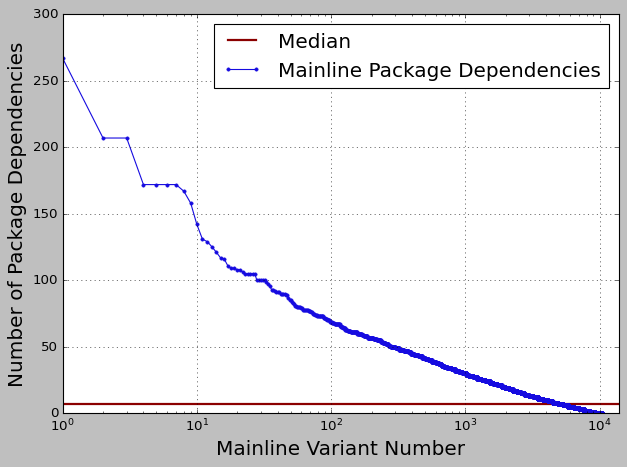

In [16]:
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

color = '#8B0000'
plt.style.use('classic')
x1 = range(1,len(df['dependencies_mainline'])+1)
y_d = df['dependencies_mainline'].sort_values(ascending=False)
median = df['dependencies_mainline'].median()
plt.axhline(median, color=color, label = 'Median', linewidth=2)
plt.plot(x1, y_d, color='#160be0', label='Mainline Package Dependencies', linewidth=1, marker='.')
plt.grid(True)
plt.xscale('log')
# plt.yscale('log')
plt.xlim(0,14000)
plt.ylim(0,300)
plt.xlabel('Mainline Variant Number', fontsize=18)
plt.ylabel('Number of Package Dependencies', fontsize=18)
# Put a legend below current axis
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('../img/dependencies_variant{}.pdf'.format(ecoystem))
plt.show()

<ipython-input-15-20fedc577248>:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,14000)


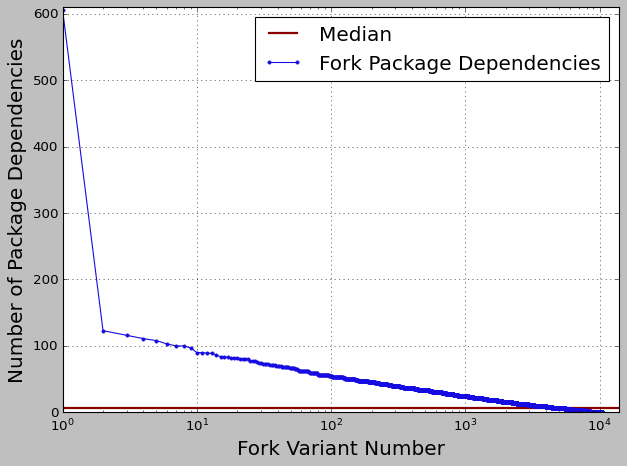

In [15]:
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

color = '#8B0000'
plt.style.use('classic')
x1 = range(1,len(df['dependencies_variant'])+1)
y_d = df['dependencies_variant'].sort_values(ascending=False)
median = df['dependencies_variant'].median()
plt.axhline(median, color=color, label = 'Median', linewidth=2)
plt.plot(x1, y_d, color='#160be0', label='Fork Package Dependencies', linewidth=1, marker='.')
plt.grid(True)
plt.xscale('log')
# plt.yscale('log')
plt.xlim(0,14000)
plt.ylim(0,610)
plt.xlabel('Fork Variant Number', fontsize=18)
plt.ylabel('Number of Package Dependencies', fontsize=18)
# Put a legend below current axis
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('../img/dependent_proj_variant{}.pdf'.format(ecoystem))
plt.show()

<ipython-input-20-e568013c2a0f>:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,12000)


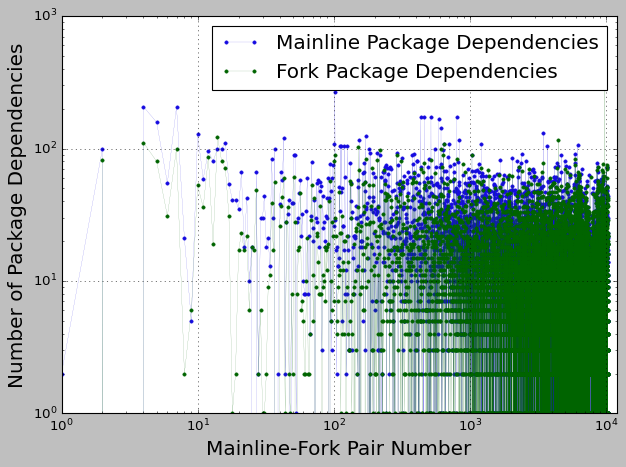

In [20]:
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

plt.style.use('classic')


x2 = range(1,len(df['dependencies_mainline'])+1)
df = df.sort_values(by = ['dependencies_mainline'], ascending=False)
y1 = df['dependencies_mainline']
y2 = df['dependencies_variant']

plt.plot(x2, y1, color='#160be0', label='Mainline Package Dependencies', linewidth=0.1, marker='.')
plt.plot(x2, y2, color='#006400', label='Fork Package Dependencies', linewidth=0.1, marker='.')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.xlim(0,12000)
plt.xlabel('Mainline-Fork Pair Number', fontsize=18)
plt.ylabel('Number of Package Dependencies', fontsize=18)
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('../img/dependencies_MLV-FV{}.pdf'.format(ecoystem))
plt.show()

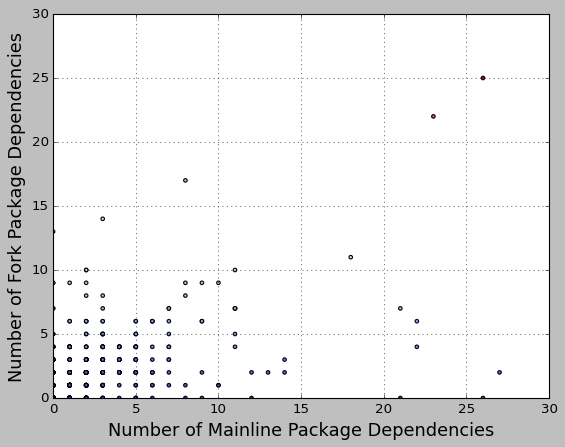

In [69]:
import scipy as sp


df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

plt.style.use('classic')



x2 = range(1,len(df['dependencies_mainline'])+1)
# df = df.sort_values(by = ['dependencies_mainline'], ascending=False)
y1 = df['dependencies_mainline']
y2 = df['dependencies_variant']

# plt.yscale('log')
# plt.xscale('log')
plt.xlim(0,30)
plt.ylim(0,30)
plt.grid(True)
plt.xlabel('Number of Mainline Package Dependencies', fontsize=16)
plt.ylabel('Number of Fork Package Dependencies', fontsize=16)
plt.scatter(y1, y2, c=y2, s=10, cmap='coolwarm')
plt.savefig('../img/dependencies_MLV-FV{}.pdf'.format(ecoystem))
plt.show()

<ipython-input-7-74006c337097>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,700)


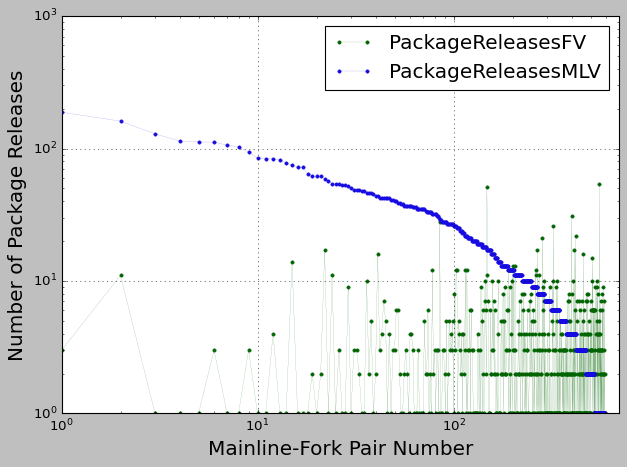

In [7]:
df = pd.read_csv('../Dataset{}.csv'.format(ecoystem), sep=';')

plt.style.use('classic')


x2 = range(1,len(df['releases_mainline'])+1)
df = df.sort_values(by = ['releases_mainline'], ascending=False)
y1 = df['releases_mainline']
y2 = df['releases_variant']

plt.plot(x2, y2, color='#006400', label='PackageReleasesFV', linewidth=0.1, marker='.')
plt.plot(x2, y1, color='#160be0', label='PackageReleasesMLV', linewidth=0.1, marker='.')

plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.xlim(0,700)
plt.xlabel('Mainline-Fork Pair Number', fontsize=18)
plt.ylabel('Number of Package Releases', fontsize=18)
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('../img/packages_releases_MLV-FV{}.pdf'.format(ecoystem))
plt.show()

In [ ]:
plt.boxplot(df["Git_MgRb_Com"]+0.1, widths=0.5, patch_artist=True, medianprops=dict(color='red'), capprops=dict(color='red'), boxprops=dict(facecolor='#008080', color='blue', linewidth=5), whiskerprops=dict(color='red'),)
plt.ylim(0.1,600)
plt.grid(True)
plt.xlabel('Git Merge/Rebase', fontsize=18)
plt.ylabel('Number of Commits', fontsize=18)
plt.xticks([1], [''])
plt.yscale('log')
plt.savefig('../img/gitPull{}.pdf'.format(ecoystem))
plt.show()

In [2]:
df_ad = pd.read_csv('../Dataset_all_variability_gitpull.csv', sep=';')

df_gitpull = df_ad[['gitPullMlv_Fv', 'Ecosystem']]
df_variablility = df_ad[['VariabilityPercentage', 'Ecosystem']]
# df_gitpull['gitPullMlv_Fv'] = df_gitpull['gitPullMlv_Fv'] + 0.01
df_gitpull.head()

,gitPullMlv_Fv,Ecosystem
0,0,Android
1,60,Android
2,0,Android
3,0,Android
4,1400,Android


In [17]:
import seaborn as sns

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])
# tips.head(30)
# ax = sns.boxplot(x="day", y="total_bill", data=tips)

<IPython.core.display.Javascript object>

In [8]:
import seaborn as sns
%matplotlib notebook
%matplotlib notebook
sns.set_theme(style="whitegrid")
# plt.style.use('classic')
ax = sns.boxplot(x="Ecosystem", y="VariabilityPercentage", data=df_ad)

# ax = sns.swarmplot(x="Ecosystem", y="gitPullMlv_Fv", data=df_ad)
ax.set_yscale("log")

ax.set_xlabel("Ecosystem",fontsize=16)
ax.set_ylabel("VariabilityPercentage",fontsize=16)
colors = ['#8B0000', '#1E90FF','#008080']

# Select which box you want to change
mybox = ax.artists[0]

# Change the appearance of that box
mybox.set_facecolor(colors[0])
mybox.set_edgecolor('black')
mybox.set_linewidth(2)

mybox = ax.artists[1]

# Change the appearance of that box
mybox.set_facecolor(colors[1])
mybox.set_edgecolor(colors[1])
mybox.set_linewidth(5)

mybox = ax.artists[2]
mybox.set_facecolor(colors[2])
mybox.set_edgecolor(colors[2])
mybox.set_linewidth(5)
plt.grid(True)
plt.savefig('../img/variability_all.pdf')

plt.show()

<IPython.core.display.Javascript object>

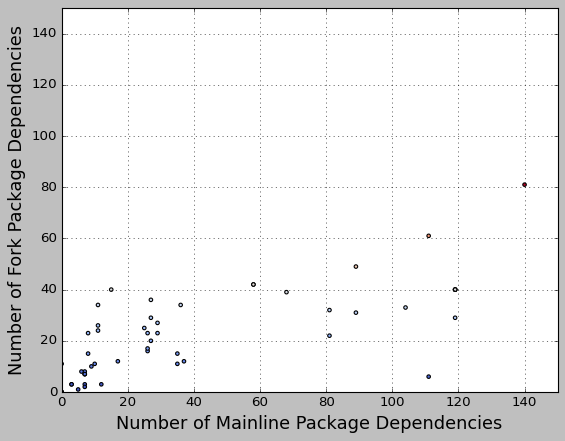

In [5]:
df = pd.read_csv('../Android_dependecies.csv', sep=';')

plt.style.use('classic')



x2 = range(1,len(df['total_dependencies_mlv'])+1)
# df = df.sort_values(by = ['dependencies_mainline'], ascending=False)
y1 = df['total_dependencies_mlv']
y2 = df['total_dependencies_fv']

# plt.yscale('log')
# plt.xscale('log')
plt.xlim(0,150)
plt.ylim(0,150)
plt.grid(True)
plt.xlabel('Number of Mainline Package Dependencies', fontsize=16)
plt.ylabel('Number of Fork Package Dependencies', fontsize=16)
plt.scatter(y1, y2, c=y2, s=10, cmap='coolwarm')
plt.savefig('../img/dependencies_Android.pdf'.format(ecoystem))
plt.show()